# Machine Learning


# **Business Case**


The objective of this project is to develop a predictive model that estimates the Probability of Default for each applicant. Instead of a simple classification, the model will generate a risk score representing the likelihood of a borrower failing to meet their obligations. This granular estimation allows the bank to implement Risk-Based Pricing, ensuring that the interest rates offered are proportional to the risk incurred. A higher risk profile would trigger a higher interest rate to compensate for the risk premium, while low-risk profiles could benefit from competitive rates.

# **Presentation of data**

In [ ]:
import pandas as pd

data = pd.read_csv('focused_synthetic_loan_data.csv')

In [ ]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,26032,467,Employed,Associate,24,17499,36,Divorced,...,2169.333333,0.704786,7,28301,0.268999,0.258727,703.859114,0.592283,0,52.0
1,2018-01-02,38,47162,552,Employed,High School,16,27728,60,Single,...,3930.166667,0.912653,8,1480,0.256728,0.242414,801.568058,0.296824,0,55.0
2,2018-01-03,47,26925,548,Self-Employed,Doctorate,26,14069,48,Married,...,2243.750000,0.680266,5,49697,0.235069,0.246830,464.003387,0.461283,0,59.0
3,2018-01-04,58,51278,583,Employed,Bachelor,36,40059,36,Single,...,4273.166667,0.881174,6,4204,0.233559,0.249076,1590.782097,0.456753,0,52.0
4,2018-01-05,37,179937,625,Employed,Bachelor,18,34774,48,Single,...,14994.750000,0.894550,4,39421,0.217274,0.260729,1173.911908,0.125038,1,40.0


Our goal will be to predicted the LoanApproved columns. (If a person can have a loan)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2000 non-null   object 
 1   Age                         2000 non-null   int64  
 2   AnnualIncome                2000 non-null   int64  
 3   CreditScore                 2000 non-null   int64  
 4   EmploymentStatus            2000 non-null   object 
 5   EducationLevel              2000 non-null   object 
 6   Experience                  2000 non-null   int64  
 7   LoanAmount                  2000 non-null   int64  
 8   LoanDuration                2000 non-null   int64  
 9   MaritalStatus               2000 non-null   object 
 10  NumberOfDependents          2000 non-null   int64  
 11  HomeOwnershipStatus         2000 non-null   object 
 12  MonthlyDebtPayments         2000 non-null   int64  
 13  CreditCardUtilizationRate   2000 

In [ ]:
data.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


# **Preprocessing :**

We'll start by encoding data to avoid text value.

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns
print('Catégories détéctées : ',list(cat_cols))
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(data[col].value_counts())
    print("Nombre de catégories :", data[col].nunique())
    print("Valeurs uniques :", data[col].unique())

Catégories détéctées :  ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

--- ApplicationDate ---
ApplicationDate
2023-06-07    1
2023-06-06    1
2023-06-05    1
2023-06-04    1
2023-06-03    1
             ..
2018-01-05    1
2018-01-04    1
2018-01-03    1
2018-01-02    1
2018-01-01    1
Name: count, Length: 2000, dtype: int64
Nombre de catégories : 2000
Valeurs uniques : ['2018-01-01' '2018-01-02' '2018-01-03' ... '2023-06-21' '2023-06-22'
 '2023-06-23']

--- EmploymentStatus ---
EmploymentStatus
Employed         1700
Self-Employed     168
Unemployed        132
Name: count, dtype: int64
Nombre de catégories : 3
Valeurs uniques : ['Employed' 'Self-Employed' 'Unemployed']

--- EducationLevel ---
EducationLevel
High School    611
Bachelor       563
Associate      417
Master         305
Doctorate      104
Name: count, dtype: int64
Nombre de catégories : 5
Valeurs uniques : ['Associate' 'High School' 'Doctorate' 'Bachelor' 'M

In [ ]:
data = data.drop(columns=['ApplicationDate'])
data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,26032,467,Employed,Associate,24,17499,36,Divorced,4,...,2169.333333,0.704786,7,28301,0.268999,0.258727,703.859114,0.592283,0,52.0
1,38,47162,552,Employed,High School,16,27728,60,Single,3,...,3930.166667,0.912653,8,1480,0.256728,0.242414,801.568058,0.296824,0,55.0
2,47,26925,548,Self-Employed,Doctorate,26,14069,48,Married,0,...,2243.750000,0.680266,5,49697,0.235069,0.246830,464.003387,0.461283,0,59.0
3,58,51278,583,Employed,Bachelor,36,40059,36,Single,1,...,4273.166667,0.881174,6,4204,0.233559,0.249076,1590.782097,0.456753,0,52.0
4,37,179937,625,Employed,Bachelor,18,34774,48,Single,3,...,14994.750000,0.894550,4,39421,0.217274,0.260729,1173.911908,0.125038,1,40.0


Thanks to this details we seen that we can't binary encode our data because all of this columns have more than 2 class. We cannot although encode by number because it will give some weight to categorie which is not what we want. So we will use get_dummies

In [ ]:
data_encoded = pd.get_dummies(data,columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],drop_first=True)
data_encoded.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45,26032,467,24,17499,36,4,581,0.231311,3,...,False,False,False,False,False,False,False,True,False,False
1,38,47162,552,16,27728,60,3,365,0.648807,3,...,False,True,False,False,False,False,False,False,True,False
2,47,26925,548,26,14069,48,0,571,0.196484,2,...,True,False,False,False,False,False,False,False,False,False
3,58,51278,583,36,40059,36,1,361,0.393796,2,...,False,True,False,False,False,False,False,False,True,False
4,37,179937,625,18,34774,48,3,701,0.524538,5,...,False,True,False,False,False,True,True,False,False,False


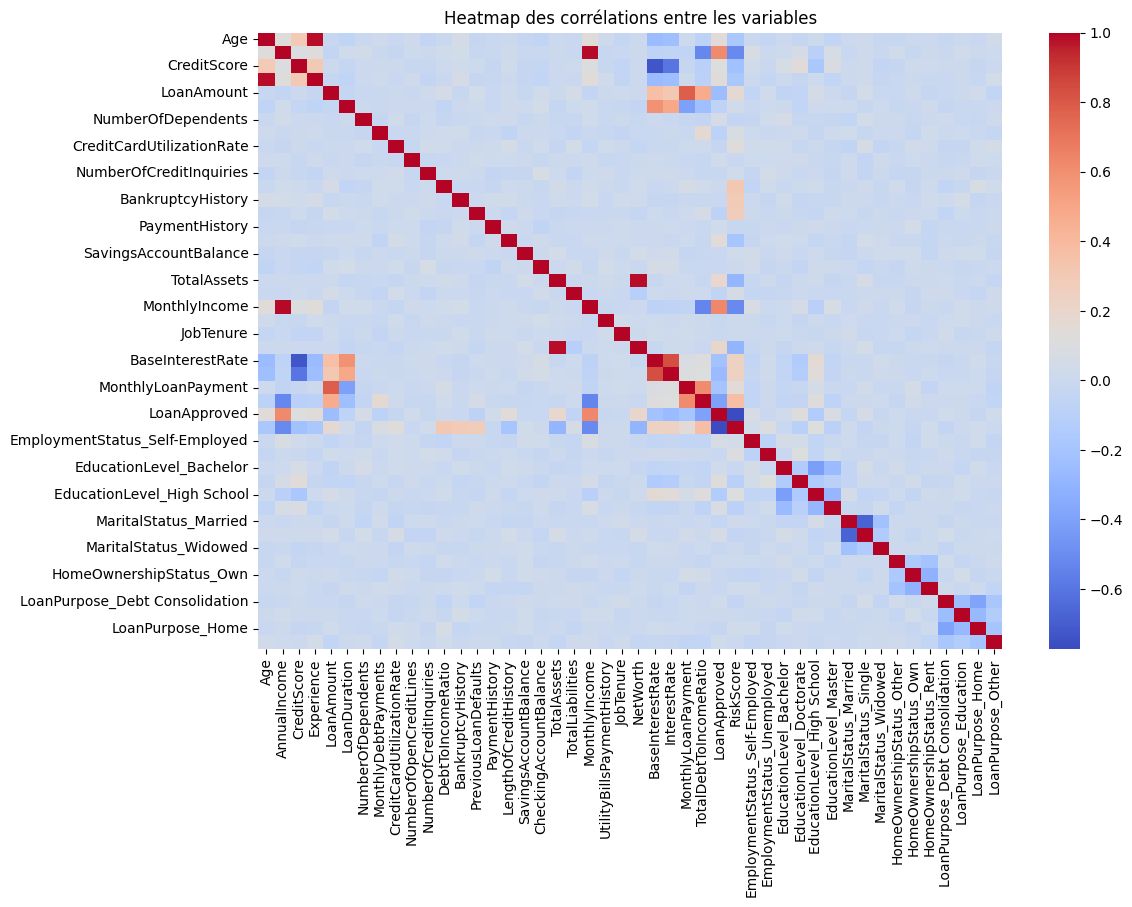

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correl= data_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correl,cmap = 'coolwarm',annot=False)
plt.title('Heatmap des corrélations entre les variables')
plt.show()

Thanks to this heatmap we can see the diferent correlations between variables and more precisely the ones correlated to LoanApprovment

We can now focus on LoanApproved to better see correlations

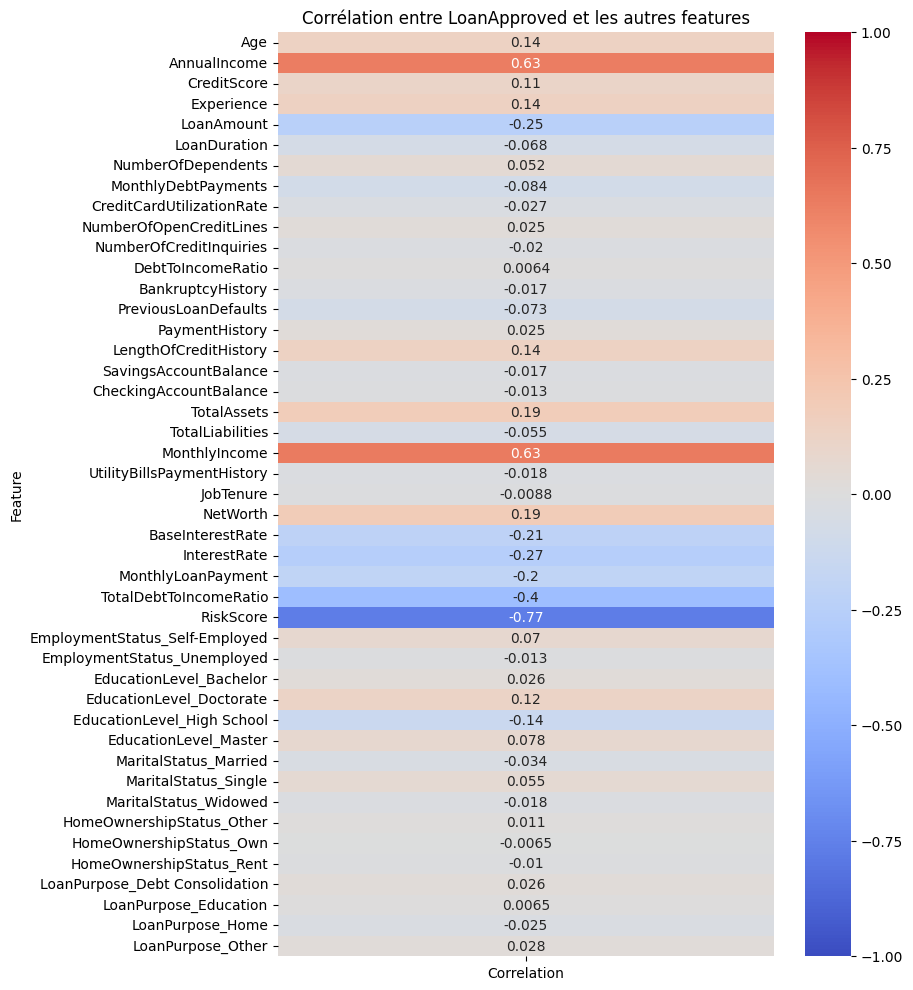

In [ ]:
corr_loanApproved = data_encoded.corr()['LoanApproved'].drop('LoanApproved')
corr_loanApproved = corr_loanApproved.to_frame().reset_index()
corr_loanApproved.columns =['Feature','Correlation']
plt.figure(figsize=(8, 12))
sns.heatmap(corr_loanApproved.set_index('Feature'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélation entre LoanApproved et les autres features")
plt.show()

For this part we will put a treshold at 0.2.
We can change it later to see if the accuracy score, f1_score_etc increase.

In [ ]:
def Data_without_coor_inf_treshold(data_encoded,treshold,target_col = 'LoanApproved'):
  corr_target = data_encoded.select_dtypes(include='number').corr()[target_col]
  kept_features = corr_target[abs(corr_target)>=treshold].index.tolist()
  rejected_features = corr_target[abs(corr_target) < treshold].index.tolist()
  df_reduced = data_encoded[kept_features].copy()
  print(f"Colonnes conservées (corrélation >= {treshold}) :", kept_features)
  print(f"Colonnes rejetées (corrélation < {treshold}) :", rejected_features)

  return df_reduced,kept_features


In [ ]:
data_loan_reduced, important_features = Data_without_coor_inf_treshold(data_encoded,0.20)

Colonnes conservées (corrélation >= 0.2) : ['AnnualIncome', 'LoanAmount', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Colonnes rejetées (corrélation < 0.2) : ['Age', 'CreditScore', 'Experience', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'MonthlyLoanPayment']


The objectif now is to show the balance between the class LoanApproved(0 and 1) <br> <br> We have made this to see if the class are equiuitbaly represented, if not we have to to add the fonction stratify = y in the train test part.

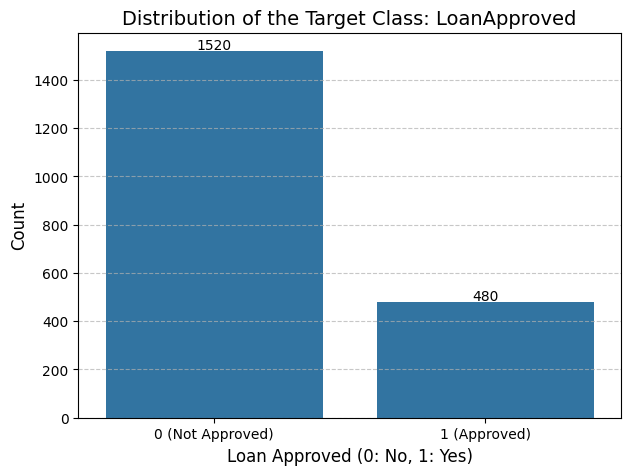

In [ ]:
class_counts = data_encoded['LoanApproved'].value_counts()

plt.figure(figsize=(7, 5));
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Distribution of the Target Class: LoanApproved', fontsize=14)
plt.xlabel('Loan Approved (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['0 (Not Approved)', '1 (Approved)'])

for index, value in enumerate(class_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10);

plt.grid(axis='y', linestyle='--', alpha=0.7);
plt.show();

In this part we'll start to create and fit a model, we'll make a function to avoid with parameters to increase the speed of compration between model

In [ ]:
def TrainAndTest(X,y, model,scale_data = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    if scale_data:
        print("Mise à l'échelle des données activée.")
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    else:
        print("Mise à l'échelle des données désactivée.")

    print(f"\n--- Entraînement et test pour {model.__class__.__name__} ---")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return X_train,y_train,y_test,y_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def TrainAndTestAndCompare(X, y, model, scale_data=True):

    X_train,y_train,y_test,y_pred  = TrainAndTest(X,y,model,scale_data)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("\nRapport de Classification :")
    print(classification_report(y_test, y_pred))
    XY = X_train,y_train,y_test,y_pred
    return acc, f1, XY


Then  we can test several model like a logistic regression or a RandomForestClassifier

In [ ]:
X = data_loan_reduced.drop('LoanApproved', axis=1)
y = data_loan_reduced['LoanApproved']

print("--- Préparation des données ---")
print(f"Features sélectionnées pour X : {list(X.columns)}")
print(f"Taille de X : {X.shape}")
print(f"Taille de y : {y.shape}")
print("-" * 30)

logistic_model = LogisticRegression(random_state=42)
acc_lr, f1_lr, XY_lr= TrainAndTestAndCompare(X, y, logistic_model, scale_data=True)
print("-" * 30)

rf_model = RandomForestClassifier(random_state=42)
acc_rf, f1_rf,XY_rf = TrainAndTestAndCompare(X, y, rf_model, scale_data=False)
print("-" * 30)

--- Préparation des données ---
Features sélectionnées pour X : ['AnnualIncome', 'LoanAmount', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'RiskScore']
Taille de X : (2000, 7)
Taille de y : (2000,)
------------------------------
Mise à l'échelle des données activée.

--- Entraînement et test pour LogisticRegression ---
Accuracy: 0.9775
F1 Score (weighted): 0.9775

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       304
           1       0.95      0.96      0.95        96

    accuracy                           0.98       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400

------------------------------
Mise à l'échelle des données désactivée.

--- Entraînement et test pour RandomForestClassifier ---
Accuracy: 0.9775
F1 Score (weighted): 0.9777

Rapport de Classification :
              precision    recall  f1-s

With this result we can assume that both has high score with the same accuracy. Nevertheless, the RandomForestClassifier model has a better F1-score which lead to a better estimation for minority values. As we are tring to estimane the potential approbation of a loan, minority values may be important.

Now, we can improve this model by adding the best features (using gridsearchCV and RandomizedSearchCV ). The main idea is first to explore the hyperparameters space with RandomizedSearchCV and then using GridSearchCV on it. This will save us a lot of time.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 5, 10, 20, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    n_iter=20,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=0
)

random_search.fit(XY_rf[0], XY_rf[1])
print(random_search.best_params_)


{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}


Now we just have to construct a narrow space between this parameters and use GridSearchCV on it.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [30, 40, 50],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 3]
}
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(XY_rf[0], XY_rf[1])

best_rf = grid.best_estimator_
print("Best refined parameters:", grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best refined parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}


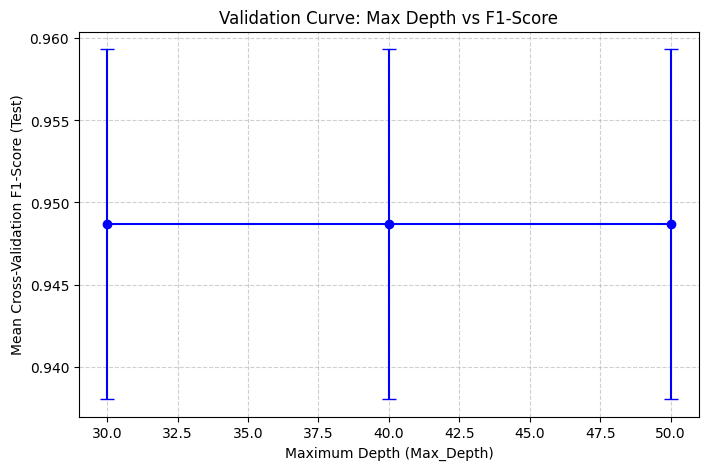

In [ ]:

cv_results = pd.DataFrame(grid.cv_results_)

results_depth = cv_results.groupby('param_max_depth')[['mean_test_score', 'std_test_score']].mean()
results_depth.reset_index(inplace=True)

plt.figure(figsize=(8, 5))
plt.errorbar(
    results_depth['param_max_depth'],
    results_depth['mean_test_score'],
    yerr=results_depth['std_test_score'],
    fmt='-o',
    capsize=5,
    color='blue'
)

plt.title("Validation Curve: Max Depth vs F1-Score")
plt.xlabel("Maximum Depth (Max_Depth)")
plt.ylabel("Mean Cross-Validation F1-Score (Test)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('validation_curve_max_depth.png')
plt.show()

The curve shows that for the tested values of max_depth (30, 40, and 50), the average F1-score on the test set (cross-validation) remained almost perfectly constant at around 0.949 (as shown by the blue line).

Conclusion:<br>
This suggests that, within this range, the model’s performance is very robust and stable with respect to changes in this parameter. Even when the trees become very deep, the performance does not decrease, which means the model is not sensitive to this hyperparameter in this interval.

Now that we have our best hyparameter we can try again our model

In [ ]:
Best_rf = RandomForestClassifier(max_depth =30, min_samples_leaf=2, min_samples_split=5, n_estimators=40,random_state=0)

print("-" * 30)
f1_be,acc_be,XY_be = TrainAndTestAndCompare(X,y,best_rf,scale_data=False)
print("-" * 30)


------------------------------
Mise à l'échelle des données désactivée.

--- Entraînement et test pour RandomForestClassifier ---
Accuracy: 0.9800
F1 Score (weighted): 0.9802

Rapport de Classification :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       304
           1       0.93      0.99      0.96        96

    accuracy                           0.98       400
   macro avg       0.96      0.98      0.97       400
weighted avg       0.98      0.98      0.98       400

------------------------------


We can see that our accuracy and F1 score has increased

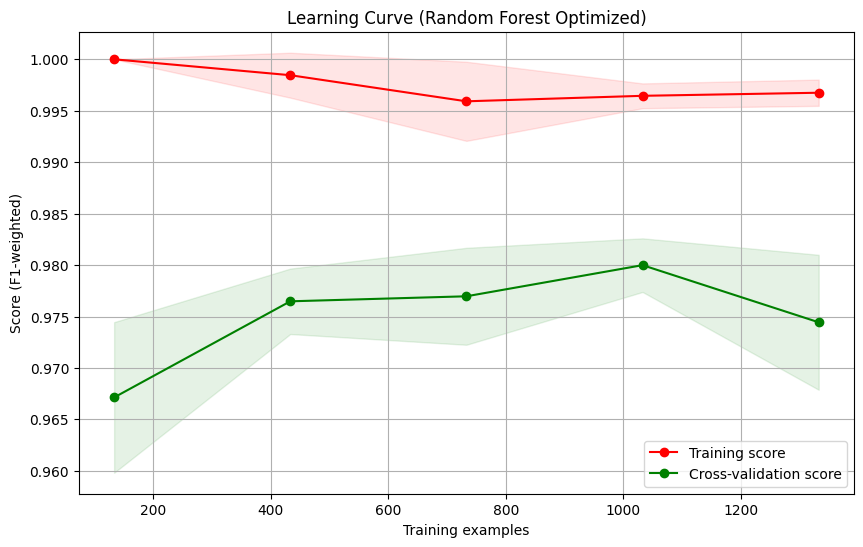

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Ton modèle Random Forest optimisé
# best_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40, random_state=0)


def plot_learning_curve(estimator, X, y, title, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Génère et trace la courbe d'apprentissage."""
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score (F1-weighted)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_weighted')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('learning_curve.png')
    plt.show()
    return plt

plot_learning_curve(best_rf, X, y, "Learning Curve (Random Forest Optimized)")

Since Logistic Regression achieved a very similar performance (0.9775) without requiring complex optimization, it can be presented as an excellent, simpler alternative that is naturally less prone to overfitting (thanks to its built-in regularization).

We can conclude that the Random Forest shows slight overfitting and that, for a real-world deployment where simplicity matters, Logistic Regression would be a more parsimonious and computationally efficient choice while delivering almost the same performance.

In [ ]:
def Compare(X,model=Best_rf,treshold = 0.2):
  D, Dfeatures= Data_without_coor_inf_treshold(X,treshold,target_col = 'LoanApproved')
  DX = D.drop('LoanApproved', axis=1)
  Dy = D['LoanApproved']
  f1_be,acc_be,XY_be = TrainAndTestAndCompare(DX,Dy,best_rf,scale_data=False)
  plot_learning_curve(model, DX, Dy, "Learning Curve (Random Forest Optimized)")


Colonnes conservées (corrélation >= 0.1) : ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LengthOfCreditHistory', 'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Colonnes rejetées (corrélation < 0.1) : ['LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalLiabilities', 'UtilityBillsPaymentHistory', 'JobTenure']
Mise à l'échelle des données désactivée.

--- Entraînement et test pour RandomForestClassifier ---
Accuracy: 0.9800
F1 Score (weighted): 0.9801

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       304
           1       0.94      0.98      0.96

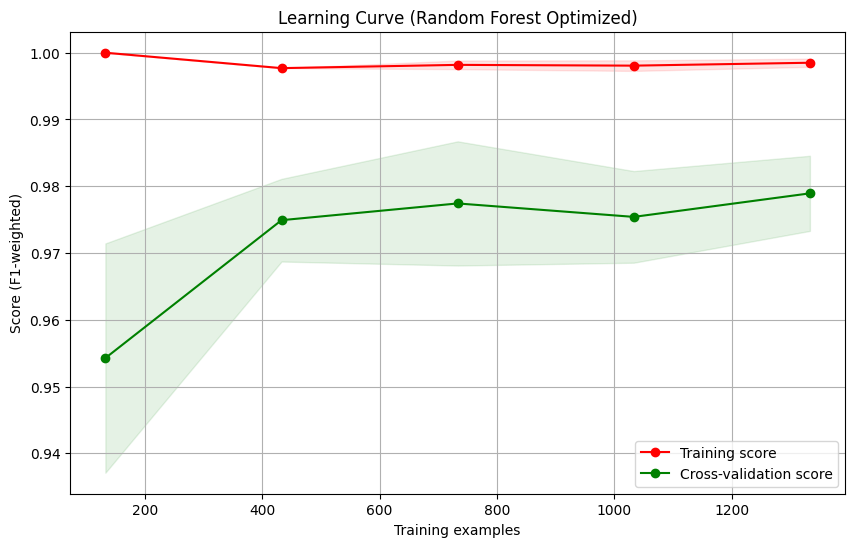

In [ ]:
Compare(data_encoded,treshold = 0.1)

Colonnes conservées (corrélation >= 0.01) : ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Colonnes rejetées (corrélation < 0.01) : ['DebtToIncomeRatio', 'JobTenure']
Mise à l'échelle des données désactivée.

--- Entraînement et test pour RandomForestClassifier ---
Accuracy: 0.9775
F1 Score (weighted): 0.9776

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       304
           1       0.94      0.97      0.

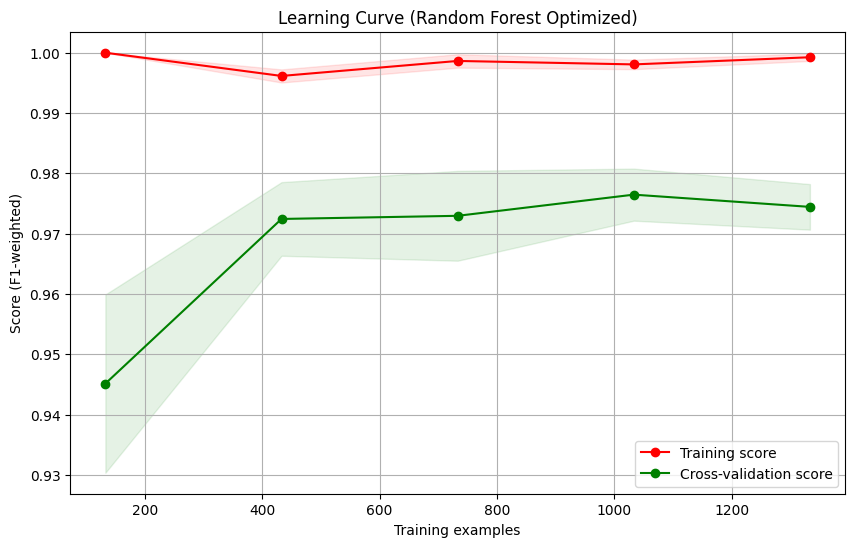

In [ ]:
Compare(data_encoded,treshold = 0.01)

# **Conclusion**

**What can we conclude
?**


From this graph and the previous one, we can see that even when we lower the threshold, neither the R² nor the F1-score increases. We can also conclude—based on the earlier results—that our Random Forest model is slightly overfitted. It performs very well overall, but Logistic Regression could be a better option in certain situations since it is simpler, more stable, and less prone to overfitting